In [15]:
%matplotlib inline

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils


In [16]:
# Set up connection to the DB
conn = db.Database('observations.sqlite')
outDir='output'

In [17]:
bundleList = []

slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='az', useCache=False)
stacker = stackers.ZenithDistStacker(altCol='alt')
sql = ''
metric = metrics.CountMetric('mjd', metricName='Nvisits as function of Alt/Az')
plotFuncs = [plots.LambertSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs, stackerList=[stacker])
bundleList.append(bundle)

slicer = slicers.HealpixSlicer(latCol='dec', lonCol='ra')
filters = ['u', 'g', 'r', 'i','z', 'y']
sqls = ['filter = "%s" and fivesigmadepth > 0' % filtername for filtername in filters]
for sql in sqls:
    metric = metrics.MedianMetric(col='fivesigmadepth')
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    
sqls.append('')
filters.append('all')
for sql,filtername in zip(sqls,filters):
    metric = metrics.CountMetric('mjd', metricName='Count_%s' % filtername)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [18]:
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
metric = metrics.OpenShutterFractionMetric(slewTimeCol='slewtime', expTimeCol='exptime', visitTimeCol='exptime')
sql=''
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


slicer=slicers.UniSlicer()
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)

slicer=slicers.UniSlicer()
metric = metrics.MeanMetric(col='slewtime')
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


slicer = slicers.OneDSlicer(sliceColName='slewtime', binsize=2)
metric = metrics.CountMetric(col='slewtime', metricName='Slew Time Histogram')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict={'logScale':True, 'ylabel':'Count'})
bundleList.append(bundle)



In [19]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)

In [20]:
group.runAll()

Querying database observations with no constraint for columns ['exptime', 'dec', 'mjd', 'ra', 'alt', 'slewtime', 'az', 'night'].
Found 2922451 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running:  ['opsim_Count_all_HEAL']
Completed metric generation.
Running:  ['opsim_OpenShutterFraction_ONED']
Completed metric generation.
Running:  ['opsim_OpenShutterFraction_UNIS', 'opsim_Mean_slewtime_UNIS']
Completed metric generation.
Running:  ['opsim_Slew_Time_Histogram_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "i" and fivesigmadepth > 0 for columns ['ra', 'dec', 'fivesigmadepth', 'mjd']
Found 473766 visits
Running:  ['opsim_Median_fivesigmadepth_i_and_fivesigmadepth_gt_0_HEAL', 'opsim_Count_i_i_and_fivesigmadepth_gt_0_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database obse

Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 763 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 880.464  dipole: lon: -75.2825, lat: -87.5884, amp: 58.3793
Plotting complete.
Plotting figures with "filter = "i" and fivesigmadepth > 0" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 274 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 23.6659  dipole: lon: -128.283, lat: -77.6869, amp: 0.115575


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 534 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 142.786  dipole: lon: -119.348, lat: -61.0118, amp: 10.7244
Plotting complete.
Plotting figures with "filter = "y" and fivesigmadepth > 0" constraint now.
monopole: 21.9739  dipole: lon: -138.034, lat: -84.9786, amp: 0.160728


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 406 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 117.547  dipole: lon: 138.204, lat: -83.3034, amp: 21.1449
Plotting complete.
Plotting figures with "filter = "g" and fivesigmadepth > 0" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 329 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.5532  dipole: lon: -132.69, lat: -39.9583, amp: 0.270306


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 289 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 164.753  dipole: lon: -40.9407, lat: -11.8333, amp: 4.93325
Plotting complete.
Plotting figures with "filter = "u" and fivesigmadepth > 0" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 23.1778  dipole: lon: -133.843, lat: -44.1653, amp: 0.378322


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 381 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 161.226  dipole: lon: 22.4002, lat: -8.40194, amp: 5.68606
Plotting complete.
Plotting figures with "filter = "z" and fivesigmadepth > 0" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 243 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 23.0519  dipole: lon: -134.85, lat: -84.402, amp: 0.121102


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 314 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 119.067  dipole: lon: -158.919, lat: -78.0229, amp: 31.1205
Plotting complete.
Plotting figures with "filter = "r" and fivesigmadepth > 0" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 396 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 24.2135  dipole: lon: -130.538, lat: -69.8642, amp: 0.12565


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 301 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 160.191  dipole: lon: -91.226, lat: -4.16205, amp: 5.39858
Plotting complete.


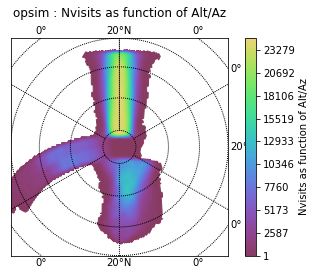

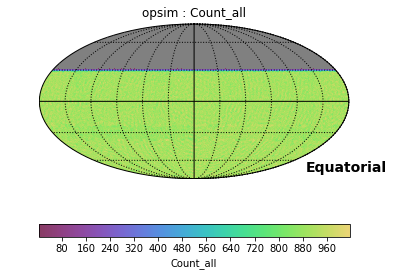

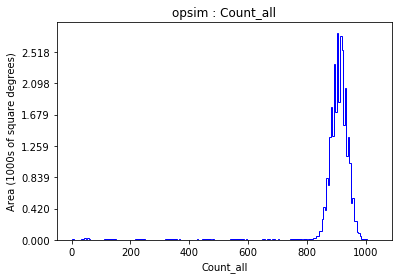

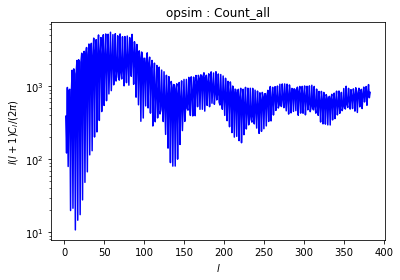

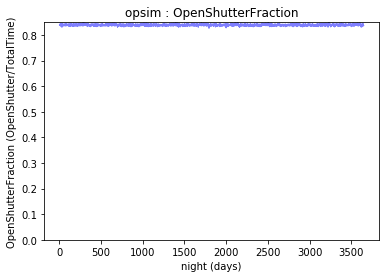

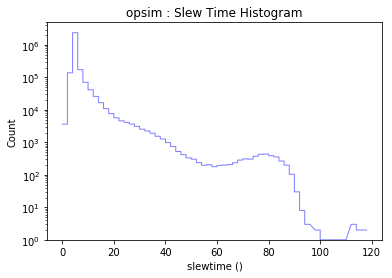

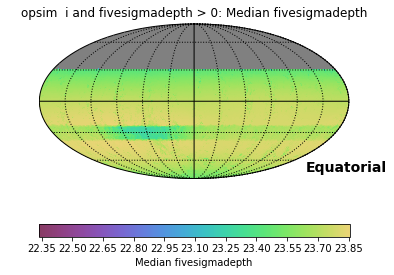

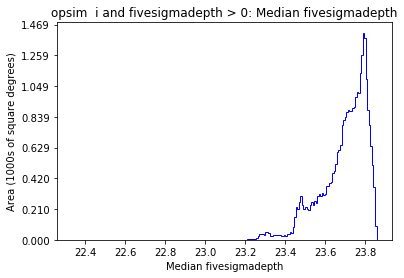

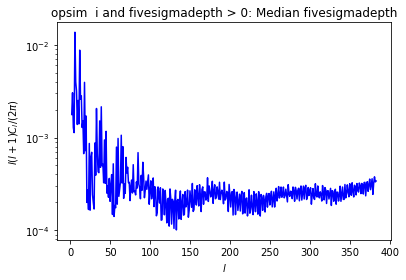

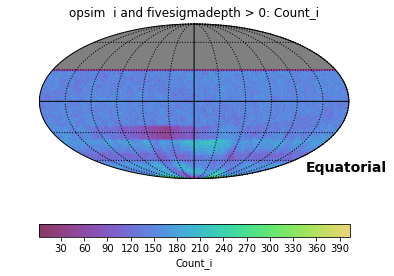

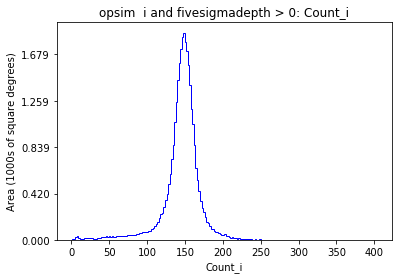

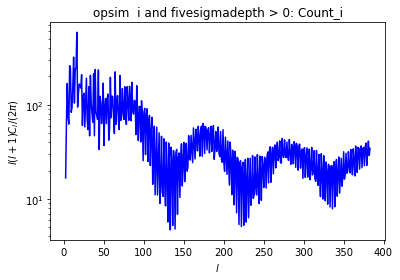

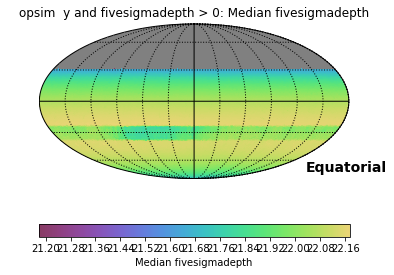

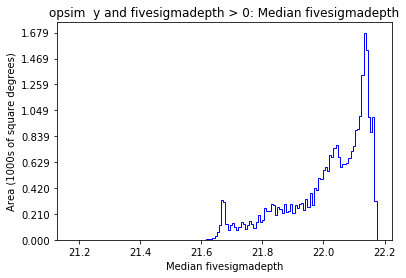

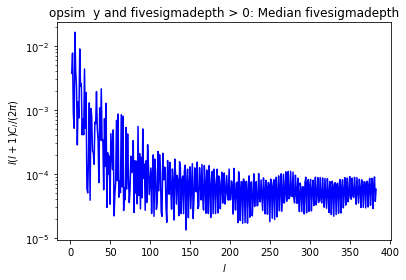

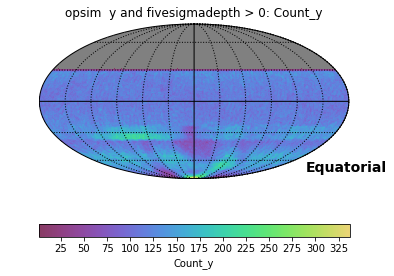

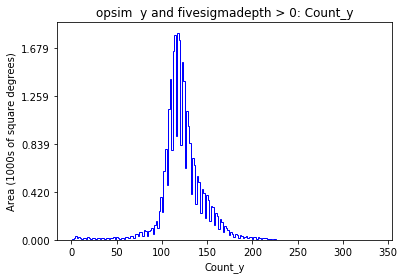

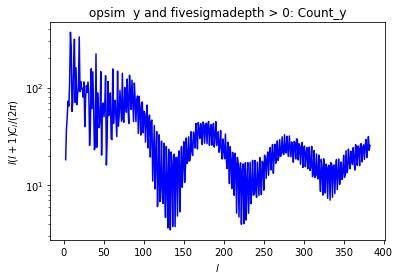

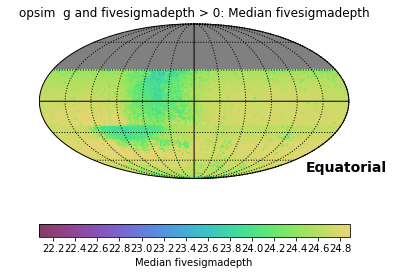

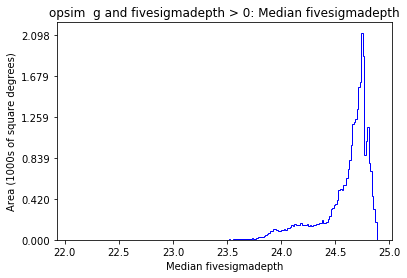

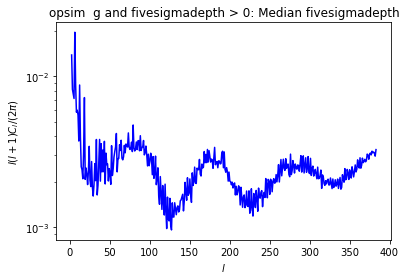

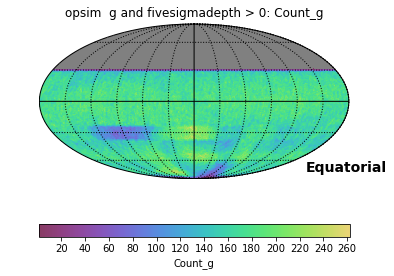

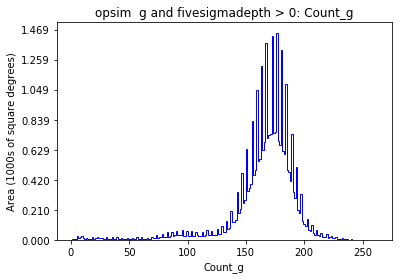

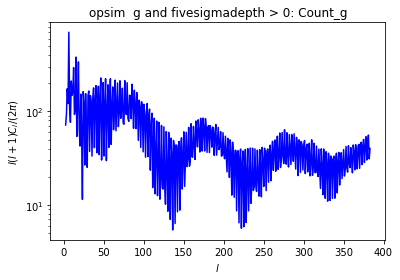

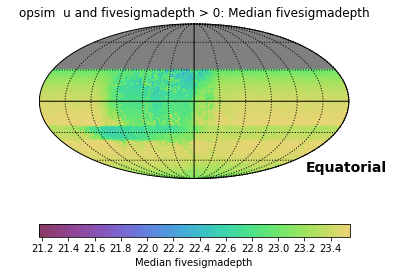

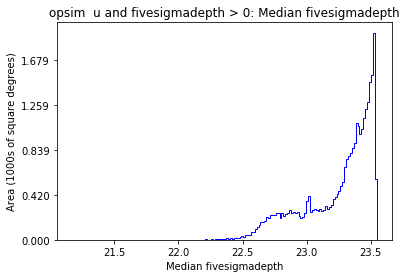

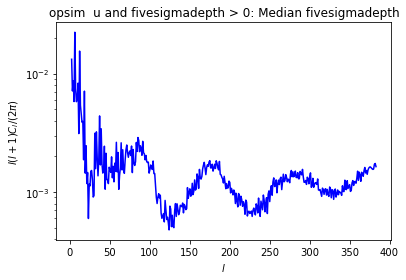

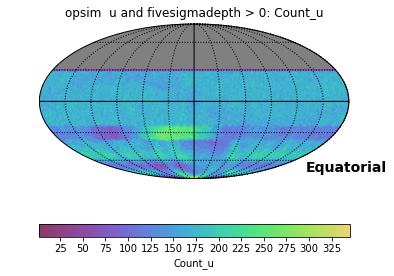

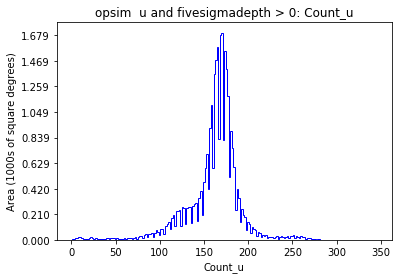

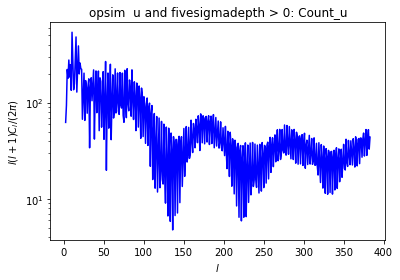

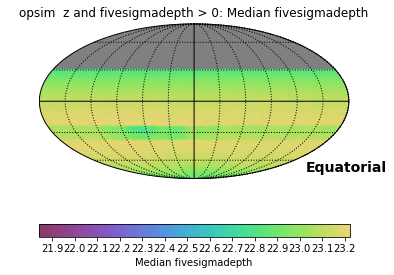

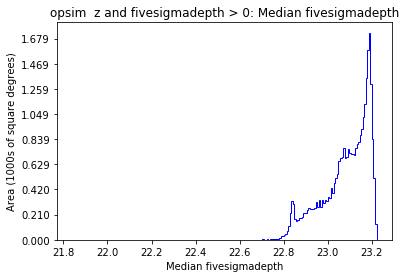

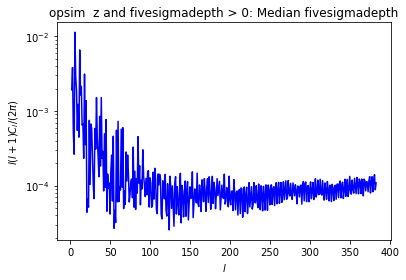

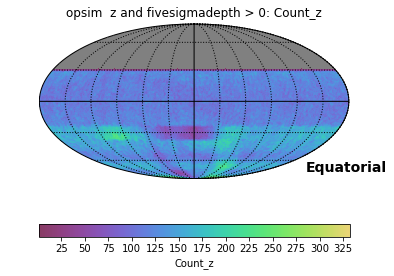

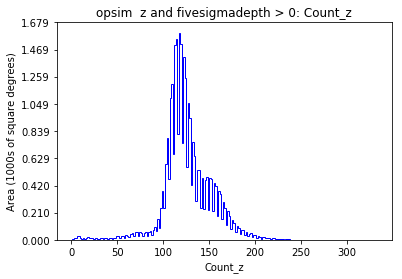

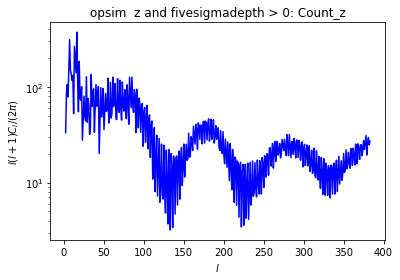

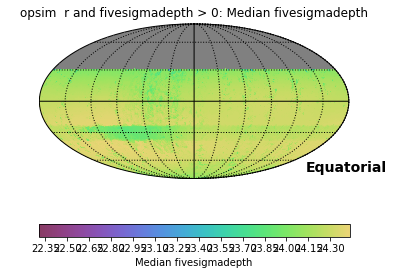

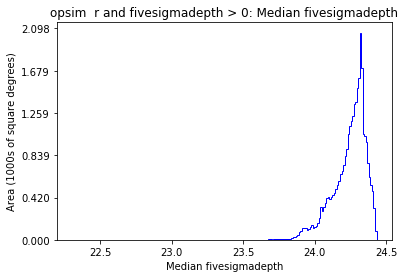

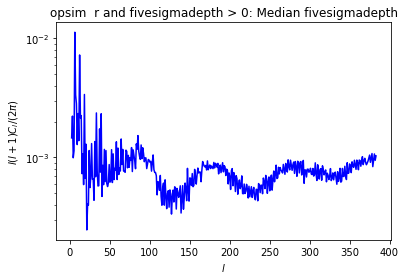

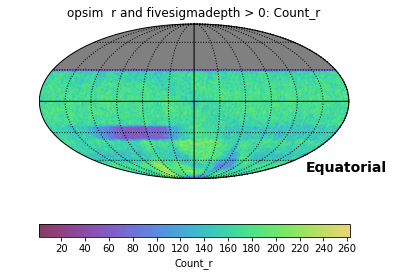

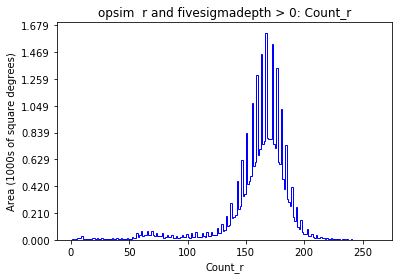

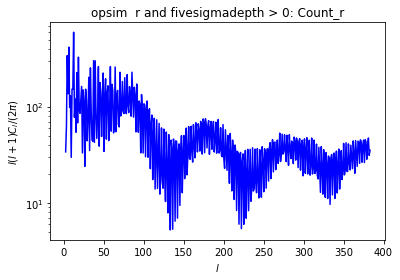

In [21]:
group.plotAll(closefigs=False)

In [22]:
bundleList[-2].metricValues

masked_array(data = [5.743843561433806],
             mask = [False],
       fill_value = -666.0)

In [23]:
bundleList[-3].metricValues

masked_array(data = [0.839305374320987],
             mask = [False],
       fill_value = -666.0)

In [24]:
bundleList = []

slicer=slicers.UniSlicer()
metric = metrics.MeanMetric(col='slewtime')
sql = 'slewtime < 100'
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


In [25]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)
group.runAll()

Querying database observations with constraint slewtime < 100 for columns ['slewtime']
Found 2922440 visits
Running:  ['opsim_Mean_slewtime_slewtime_lt_100_UNIS']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [26]:
bundleList[0].metricValues

masked_array(data = [5.743447790186208],
             mask = [False],
       fill_value = -666.0)